# DAT402 - Final Project
## Brain Tumor Classification (MRI)
By Annicha Jeerasawat

## Introduction
<div>
<img src="https://www.princetonbrainandspine.com/wp-content/uploads/2024/07/brain-tumors.jpg" width="450"/>
</div>

A brain tumor is an abnormal growth of cells inside the brain or skull; some are benign, others malignant. Tumors can grow from the brain tissue itself (primary), or cancer from elsewhere in the body can spread to the brain (metastasis).

### Types of brain tumor:
1. Glioma tumor - Glioma is a growth of cells that starts in the brain or spinal cord. The cells in a glioma look similar to healthy brain cells called glial cells. The tumor can grow to press on brain or spinal cord tissue and cause symptoms.
2. Meningioma tumor - Meningiomas originate in the meninges, the outer three layers of tissue that cover and protect the brain just under the skull. About 85% of meningiomas are noncancerous, slow-growing tumors.
3. Pituitary tumor - This small gland is located near the base of the brain. Most tumors that happen in and around the pituitary gland are benign.


## Problem defining

In this problem, we want to classified whether the MRI picture of brain has a tumor or not. If it classified as having a tumor, so then we want to know which type of founded tumor is.

## Import neccessary libraries and load the data

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


## Import the dataset from Kaggle

In [5]:
import kagglehub

# Download latest version
brain = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", brain)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\sartajbhuvaji\brain-tumor-classification-mri\versions\2


I downloaded the dataset to my laptop, so the dataset has two main folders which are training and testing sets.

In [6]:
train_path = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Training"
test_path = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Testing"

## Data Exploration

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Initialize the ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load testing images
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


From the previous data exploration, there are 2870 observations with four files in training folder and there are 394 observations with four files in testing folder. 

In [8]:
import os
# count the total number of images in the entire training dataset
total_image = 0

classes = ['no_tumor' ,'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']
for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    total_image += len(os.listdir(class_path))

print(f"Total number of images in the dataset: {total_image}")

Total number of images in the dataset: 2870


In [9]:
#Check the Type of the Images
from tensorflow.keras.preprocessing.image import load_img
image_name = os.listdir(class_path)[0]
img = load_img(os.path.join(class_path, image_name))

image_mode = img.mode
print(f"The type of the first image is: {image_mode}") #Image is color

img_array = np.array(img)

# Get the shape of the first image
image_shape = img_array.shape
print(f"The shape of the first image is: {image_shape}") # rows, columns, and channels

The type of the first image is: RGB
The shape of the first image is: (512, 512, 3)


In [10]:
# Find the maximum of pixels in each picture
max_pixel_value = float('-inf')

for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    for image_name in os.listdir(class_path):
        img_path = os.path.join(class_path, image_name)
        img = load_img(img_path, target_size=(150, 150))  # Resize if necessary
        img_array = np.array(img)

        max_pixel_value = max(max_pixel_value, np.max(img_array))

print(f"Maximum pixel value in the entire training dataset: {max_pixel_value}")


Maximum pixel value in the entire training dataset: 255


## Preprocessing the Data

In [11]:
pip install opencv-python

In this process, I'm trying to make a data preprocessing by combining all sub-folders (four file categories) together and using opencv to read each image within the folder. Before that, I resize each image to 256x256 for avoid the low quality of pictures and improve the model performance. Then, I split the training set to training images and labels as well as testing set. Finally, I convert those lists into numpy array for making it easier to perform model building and further process. 

In [12]:
import cv2
import os
import numpy as np

#training folders
folder1 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Training\\no_tumor"
folder2 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Training\\glioma_tumor"
folder3 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Training\\meningioma_tumor"
folder4 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Training\\pituitary_tumor"

#testing folders
folder5 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Testing\\no_tumor"
folder6 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Testing\\glioma_tumor"
folder7 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Testing\\meningioma_tumor"
folder8 = "C:\\Users\\ASUS\\OneDrive\\Desktop\\ASU Online\\DAT402\\archive\\Testing\\pituitary_tumor"

# Lists for training and testing
training_images = []
training_labels = []

testing_images = []
testing_labels = []

resize_width = 256
resize_height = 256

for img1_name, img2_name, img3_name, img4_name in zip(os.listdir(folder1), os.listdir(folder2), os.listdir(folder3), os.listdir(folder4)):
    img1 = cv2.imread(os.path.join(folder1, img1_name))
    img2 = cv2.imread(os.path.join(folder2, img2_name))
    img3 = cv2.imread(os.path.join(folder3, img3_name))
    img4 = cv2.imread(os.path.join(folder4, img4_name))

    img1 = cv2.resize(img1, (resize_width, resize_height))
    img2 = cv2.resize(img2, (resize_width, resize_height))
    img3 = cv2.resize(img3, (resize_width, resize_height))
    img4 = cv2.resize(img4, (resize_width, resize_height))

    training_images.append(img1)
    training_images.append(img2)
    training_images.append(img3)
    training_images.append(img4)

    training_labels.append(0)  # Label for "no_tumor"
    training_labels.append(1)  # Label for "glioma_tumor"
    training_labels.append(2)  # Label for "meningioma_tumor"
    training_labels.append(3)  # Label for "pituitary_tumor"

for img5_name, img6_name, img7_name, img8_name in zip(os.listdir(folder5), os.listdir(folder6), os.listdir(folder7), os.listdir(folder8)):
    img5 = cv2.imread(os.path.join(folder5, img5_name))
    img6 = cv2.imread(os.path.join(folder6, img6_name))
    img7 = cv2.imread(os.path.join(folder7, img7_name))
    img8 = cv2.imread(os.path.join(folder8, img8_name))

    img5 = cv2.resize(img5, (resize_width, resize_height))
    img6 = cv2.resize(img6, (resize_width, resize_height))
    img7 = cv2.resize(img7, (resize_width, resize_height))
    img8 = cv2.resize(img8, (resize_width, resize_height))

    testing_images.append(img5)
    testing_images.append(img6)
    testing_images.append(img7)
    testing_images.append(img8)

    testing_labels.append(0)  # Label for "no_tumor"
    testing_labels.append(1)  # Label for "glioma_tumor"
    testing_labels.append(2)  # Label for "meningioma_tumor"
    testing_labels.append(3)  # Label for "pituitary_tumor"

# Convert the lists to arrays
training_images_array = np.array(training_images)
testing_images_array = np.array(testing_images)

# Convert labels into a numpy array
training_labels_array = np.array(training_labels)
testing_labels_array = np.array(testing_labels)

In [13]:
type(training_images_array)
type(testing_images_array)

numpy.ndarray

In [14]:
type(training_labels_array)
type(testing_labels_array)

numpy.ndarray

In [15]:
print("Training images array shape:", training_images_array.shape)
print("Training labels array shape:", training_labels_array.shape)

print("Testing images array shape:", testing_images_array.shape)
print("Testing labels array shape:", testing_labels_array.shape)
# number of images, pixel (height), pixel (width), number of color channel (RGB)
# number of labels

Training images array shape: (1580, 256, 256, 3)
Training labels array shape: (1580,)
Testing images array shape: (296, 256, 256, 3)
Testing labels array shape: (296,)


In [ ]:
# Optional task: See if different pixel sizes could change the model performance
pixel_ls = [50, 100, 150, 200, 256]

resized_training_images = {}
resized_testing_images = {}

# Resize the images
for i in pixel_ls:
    resized_training_images[i] = []
    resized_testing_images[i] = []

    for image in training_images:
        resized_image = cv2.resize(image, (i, i))
        resized_training_images[i].append(resized_image)

    for image in testing_images:
        resized_image = cv2.resize(image, (i, i))
        resized_testing_images[i].append(resized_image)

# Convert the lists of resized images into numpy arrays
for i in pixel_ls:
    resized_training_images[i] = np.array(resized_training_images[i])
    resized_testing_images[i] = np.array(resized_testing_images[i])

## Neural Network

## Building the model

First, we have to divided training images array and testing images array by 255 because we want to normalize the pixel values to range [0,1] which it helps us imrpoving the stability and efficiency of model while training the data

In [17]:
for i in pixel_ls:
    resized_training_images[i] = resized_training_images[i] / 255
    resized_testing_images[i] = resized_testing_images[i] / 255

Since I looked up each file in both folder. There are four classes which are no tumor, glioma tumor, meningioma tumor, and pituitary tumor. Then, I created 3x4 grid or plot 12 pictures of the data by using matplotlib. The plot shows the brain tumor MRI images and their labels. 

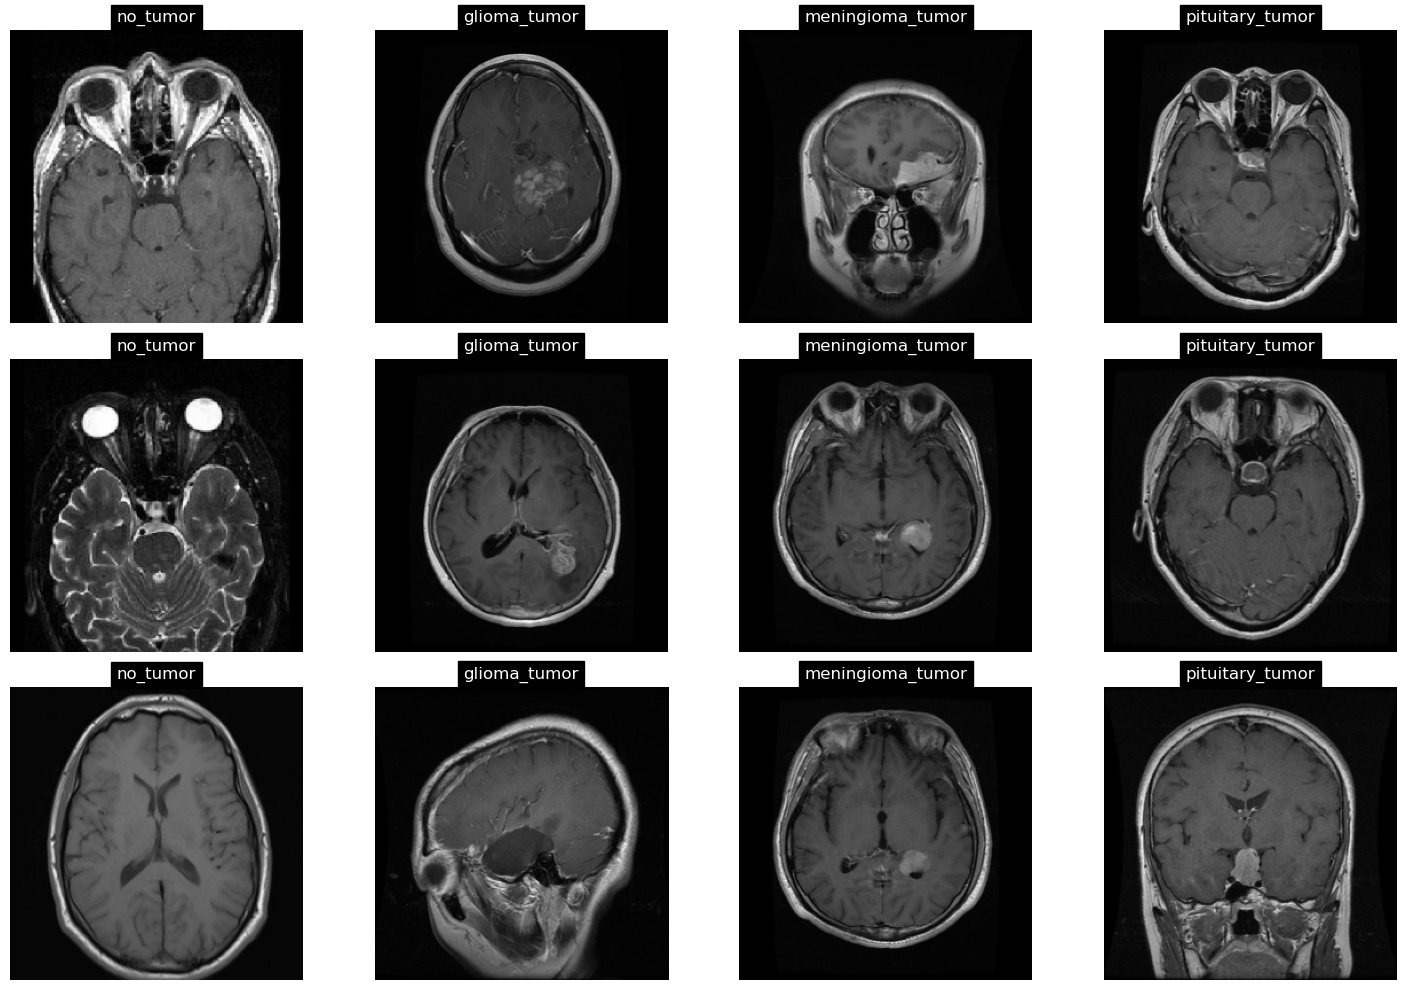

In [18]:
class_names = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Create a 3x4 grid (12 images)
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Plot the first 12 images
for i in range(12):
    image = training_images_array[i]
    label = training_labels_array[i]

    ax = axes[i]
    ax.imshow(image) 
    ax.axis('off') 

    # Display the class name
    ax.set_title(class_names[label], fontsize=12, color='white', backgroundcolor='black')

plt.tight_layout()
plt.show()

In this step, we are building the neural network model which sequential model is a model we choose for this dataset. Then, we flat the 3D input images into 1D vector and connect the layer by using Rectified Linear Unit activation for avoiding gradients vanish, following with hyperbolic tangent as another activation. Then, we convert the raw scores (logits) for each class into probabilities so since we have four classes then the unit set as 4.

The model uses Adam optimizer and loss function as sparse_categorical_crossentropy which is commonly use when we have multi-class classification problem. This method we are trying to predict how far the predicted probabilities are from the true class label.

In [ ]:
import tensorflow as tf

# Variables to track the best pixel size and accuracy
best_pixel_size = None
best_accuracy = 0

for j in pixel_ls:
    # Define a new model for each pixel size
    mynet = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(j, j, 3), name='input_layers'), 
        tf.keras.layers.Dense(units=128, activation='relu', name='hidden1'), 
        tf.keras.layers.Dense(units=512, activation='tanh', name='hidden2'),
        tf.keras.layers.Dense(units=4, activation='softmax', name='output_layer') 
    ], name='mynet')

    # Compile the model
    mynet.compile(optimizer='adam',  # Optimizer
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Model Summary for {j}x{j} input images:")
    mynet.summary()

    current_training_images = resized_training_images[j]

    mynet.fit(current_training_images, training_labels_array, epochs=10, batch_size=32, verbose=2)

    # Evaluate the model on resized test images
    current_testing_images = resized_testing_images[j]
    test_loss, test_acc = mynet.evaluate(current_testing_images, testing_labels_array, verbose=2)

    print(f"Test results for {j}x{j} images - Loss: {test_loss}, Accuracy: {test_acc}")

    # Track the best accuracy and pixel size
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_pixel_size = j

print(f"\nBest Pixel Size: {best_pixel_size}x{best_pixel_size}")
print(f"Highest Accuracy: {best_accuracy}")


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Summary for 50x50 input images:


Model: "mynet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (Flatten)          │ (None, 7500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │       960,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028,228 (3.92 MB)

 Trainable params: 1,028,228 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 - 2s - 37ms/step - accuracy: 0.5247 - loss: 1.1021
Epoch 2/10
50/50 - 1s - 15ms/step - accuracy: 0.7222 - loss: 0.7194
Epoch 3/10
50/50 - 1s - 11ms/step - accuracy: 0.8190 - loss: 0.4870
Epoch 4/10
50/50 - 0s - 9ms/step - accuracy: 0.8646 - loss: 0.3670
Epoch 5/10
50/50 - 0s - 9ms/step - accuracy: 0.8861 - loss: 0.3056
Epoch 6/10
50/50 - 0s - 9ms/step - accuracy: 0.9025 - loss: 0.2655
Epoch 7/10
50/50 - 0s - 9ms/step - accuracy: 0.9392 - loss: 0.1829
Epoch 8/10
50/50 - 0s - 10ms/step - accuracy: 0.9532 - loss: 0.1471
Epoch 9/10
50/50 - 0s - 9ms/step - accuracy: 0.9646 - loss: 0.1227
Epoch 10/10
50/50 - 0s - 9ms/step - accuracy: 0.9411 - loss: 0.1661
10/10 - 0s - 23ms/step - accuracy: 0.5203 - loss: 3.6602
Test results for 50x50 images - Loss: 3.660214424133301, Accuracy: 0.5202702879905701
Model Summary for 100x100 input images:


Model: "mynet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (Flatten)          │ (None, 30000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │     3,840,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,908,228 (14.91 MB)

 Trainable params: 3,908,228 (14.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 - 3s - 65ms/step - accuracy: 0.4981 - loss: 1.1664
Epoch 2/10
50/50 - 3s - 50ms/step - accuracy: 0.6671 - loss: 0.8524
Epoch 3/10
50/50 - 2s - 34ms/step - accuracy: 0.7766 - loss: 0.5983
Epoch 4/10
50/50 - 3s - 53ms/step - accuracy: 0.8203 - loss: 0.5069
Epoch 5/10
50/50 - 2s - 34ms/step - accuracy: 0.8557 - loss: 0.3488
Epoch 6/10
50/50 - 2s - 34ms/step - accuracy: 0.8677 - loss: 0.3544
Epoch 7/10
50/50 - 2s - 34ms/step - accuracy: 0.9158 - loss: 0.2486
Epoch 8/10
50/50 - 2s - 36ms/step - accuracy: 0.9481 - loss: 0.1645
Epoch 9/10
50/50 - 2s - 35ms/step - accuracy: 0.9291 - loss: 0.1885
Epoch 10/10
50/50 - 2s - 35ms/step - accuracy: 0.9386 - loss: 0.1682
10/10 - 0s - 30ms/step - accuracy: 0.5608 - loss: 2.1527
Test results for 100x100 images - Loss: 2.1527233123779297, Accuracy: 0.5608108043670654
Model Summary for 150x150 input images:


Model: "mynet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (Flatten)          │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,708,228 (33.22 MB)

 Trainable params: 8,708,228 (33.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 - 5s - 93ms/step - accuracy: 0.4658 - loss: 1.2824
Epoch 2/10
50/50 - 4s - 72ms/step - accuracy: 0.5905 - loss: 1.0251
Epoch 3/10
50/50 - 5s - 101ms/step - accuracy: 0.6209 - loss: 0.9608
Epoch 4/10
50/50 - 3s - 69ms/step - accuracy: 0.7044 - loss: 0.8107
Epoch 5/10
50/50 - 3s - 69ms/step - accuracy: 0.7373 - loss: 0.7598
Epoch 6/10
50/50 - 3s - 69ms/step - accuracy: 0.7690 - loss: 0.6402
Epoch 7/10
50/50 - 5s - 104ms/step - accuracy: 0.8057 - loss: 0.5332
Epoch 8/10
50/50 - 3s - 69ms/step - accuracy: 0.8411 - loss: 0.4544
Epoch 9/10
50/50 - 4s - 71ms/step - accuracy: 0.8538 - loss: 0.3741
Epoch 10/10
50/50 - 4s - 70ms/step - accuracy: 0.8728 - loss: 0.3295
10/10 - 0s - 30ms/step - accuracy: 0.5541 - loss: 1.6623
Test results for 150x150 images - Loss: 1.6623189449310303, Accuracy: 0.5540540814399719
Model Summary for 200x200 input images:


Model: "mynet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (Flatten)          │ (None, 120000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │    15,360,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,428,228 (58.85 MB)

 Trainable params: 15,428,228 (58.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 - 8s - 163ms/step - accuracy: 0.5082 - loss: 1.2766
Epoch 2/10
50/50 - 6s - 126ms/step - accuracy: 0.5570 - loss: 1.0614
Epoch 3/10
50/50 - 6s - 121ms/step - accuracy: 0.5677 - loss: 1.0432
Epoch 4/10
50/50 - 6s - 120ms/step - accuracy: 0.6196 - loss: 0.9661
Epoch 5/10
50/50 - 6s - 120ms/step - accuracy: 0.6247 - loss: 0.9441
Epoch 6/10
50/50 - 6s - 119ms/step - accuracy: 0.6937 - loss: 0.8333
Epoch 7/10
50/50 - 6s - 121ms/step - accuracy: 0.7272 - loss: 0.7724
Epoch 8/10
50/50 - 6s - 121ms/step - accuracy: 0.7443 - loss: 0.7201
Epoch 9/10
50/50 - 6s - 121ms/step - accuracy: 0.7544 - loss: 0.6476
Epoch 10/10
50/50 - 6s - 119ms/step - accuracy: 0.7867 - loss: 0.6063
10/10 - 0s - 38ms/step - accuracy: 0.4527 - loss: 1.6838
Test results for 200x200 images - Loss: 1.6838375329971313, Accuracy: 0.45270270109176636
Model Summary for 256x256 input images:


Model: "mynet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layers (Flatten)          │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,234,052 (96.26 MB)

 Trainable params: 25,234,052 (96.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
50/50 - 12s - 233ms/step - accuracy: 0.4829 - loss: 1.3229
Epoch 2/10
50/50 - 10s - 196ms/step - accuracy: 0.5241 - loss: 1.1299
Epoch 3/10
50/50 - 10s - 196ms/step - accuracy: 0.4791 - loss: 1.1843
Epoch 4/10
50/50 - 10s - 190ms/step - accuracy: 0.5323 - loss: 1.1002
Epoch 5/10
50/50 - 9s - 188ms/step - accuracy: 0.5494 - loss: 1.0808
Epoch 6/10
50/50 - 9s - 189ms/step - accuracy: 0.5734 - loss: 1.0434
Epoch 7/10
50/50 - 9s - 187ms/step - accuracy: 0.5848 - loss: 1.0390
Epoch 8/10
50/50 - 9s - 186ms/step - accuracy: 0.5804 - loss: 0.9917
Epoch 9/10
50/50 - 10s - 190ms/step - accuracy: 0.6253 - loss: 0.9589
Epoch 10/10
50/50 - 10s - 196ms/step - accuracy: 0.6354 - loss: 0.9031
10/10 - 0s - 45ms/step - accuracy: 0.3142 - loss: 1.6032
Test results for 256x256 images - Loss: 1.6032103300094604, Accuracy: 0.31418919563293457

Best Pixel Size: 100x100
Highest Accuracy: 0.5608108043670654


In [ ]:
image_to_predict1 = current_testing_images[100]

# Expand dimensions to include the batch size
image_to_predict1 = np.expand_dims(image_to_predict1, axis=0)

# Normalize the image
image_to_predict1 = image_to_predict1 / 255.0

prediction1 = mynet.predict(image_to_predict1)

print(f"Prediction: {prediction1}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
Prediction: [[0.42728487 0.09935145 0.23041087 0.24295278]]


In [ ]:
image_to_predict2 = current_testing_images[256]

# Expand dimensions to include the batch size
image_to_predict2 = np.expand_dims(image_to_predict2, axis=0)

# Normalize the image
image_to_predict2 = image_to_predict2 / 255.0

prediction2 = mynet.predict(image_to_predict2)

print(f"Prediction: {prediction2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: [[0.30292913 0.17124258 0.4530261  0.07280222]]


In this process, we wanted to compare our prediction to the actual results by plotting some pictures. If the image is correctly predicted, so the green bar will appear as well as the green predicted label. Otherwise, we will see the red labels and red bar on the wrong prediction while we can observe which is the right actual result of each image showing on the green bar. The blue bars are the probability that the image is likely to be in other classes. 

In [58]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array)
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color((0,0.8,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


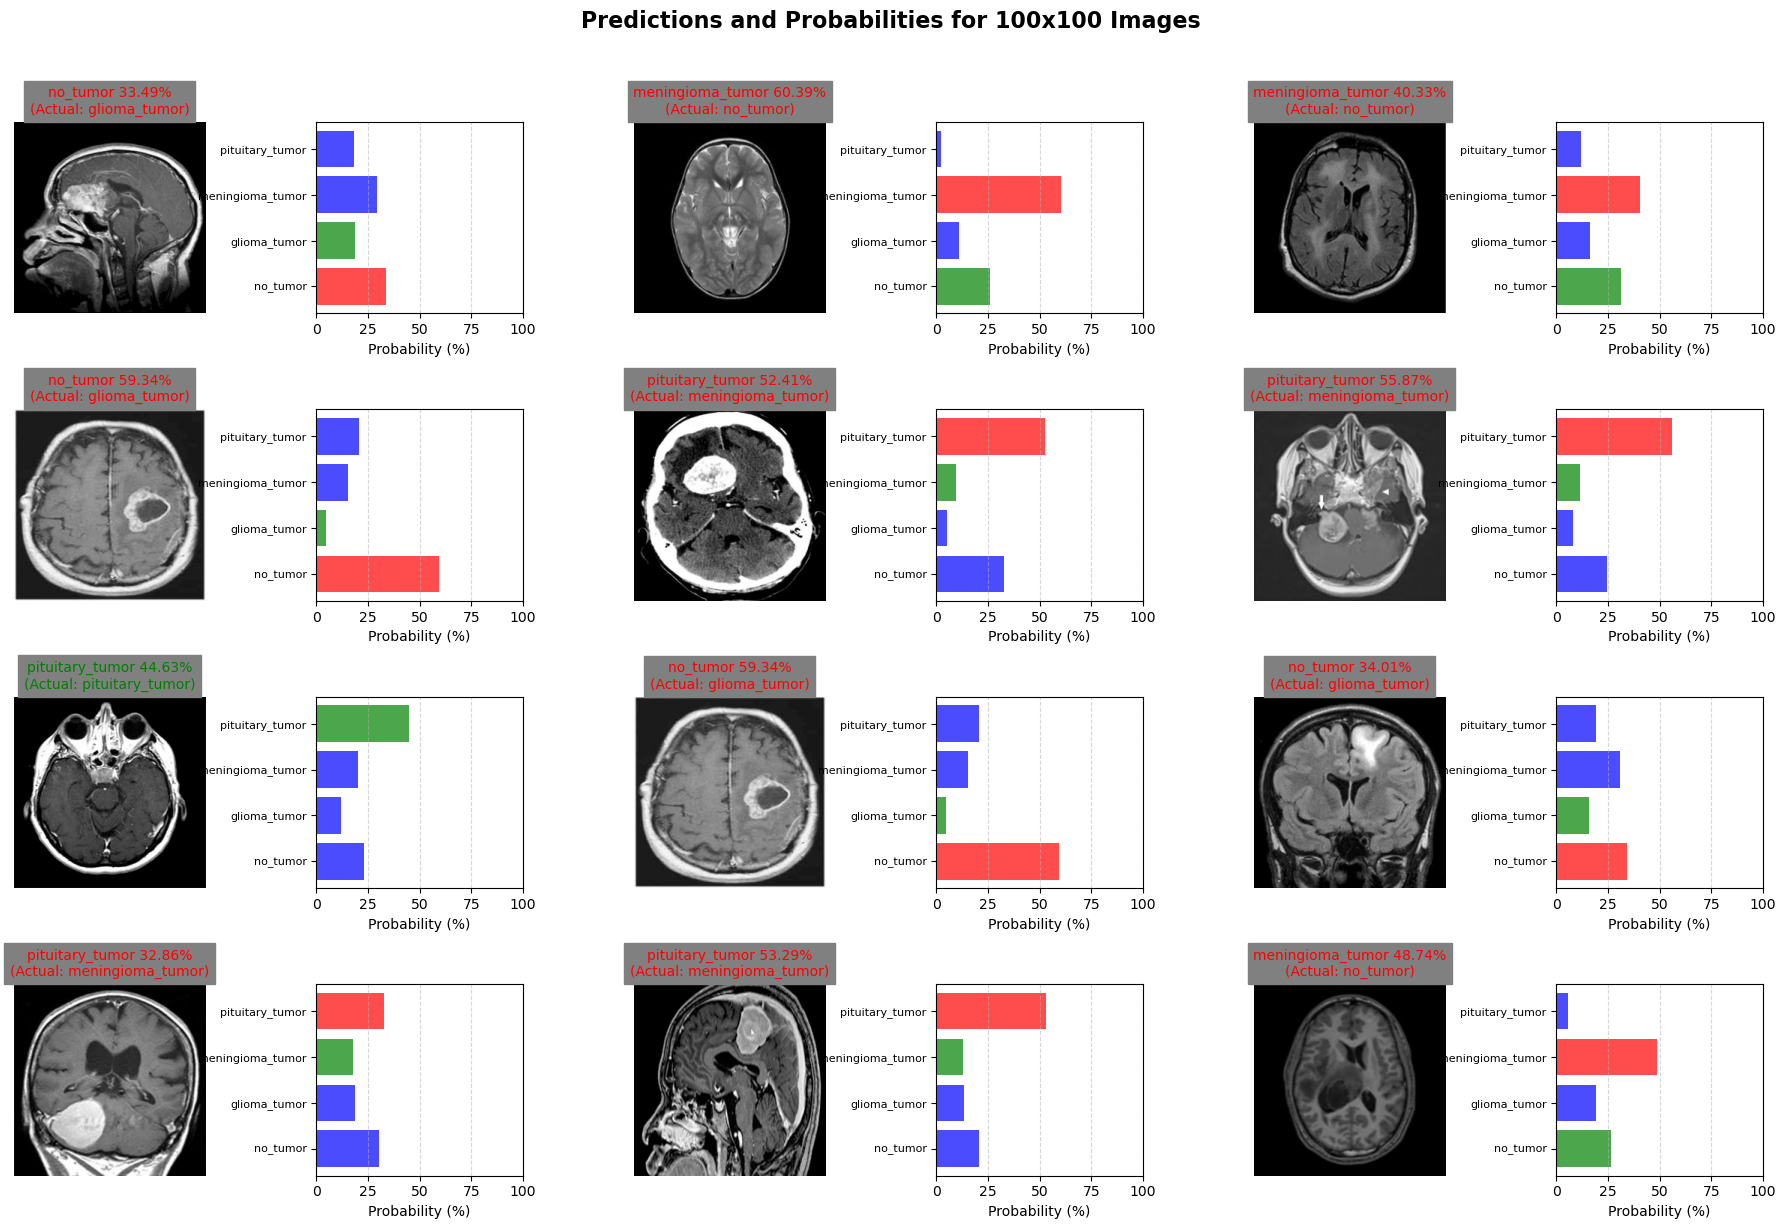

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


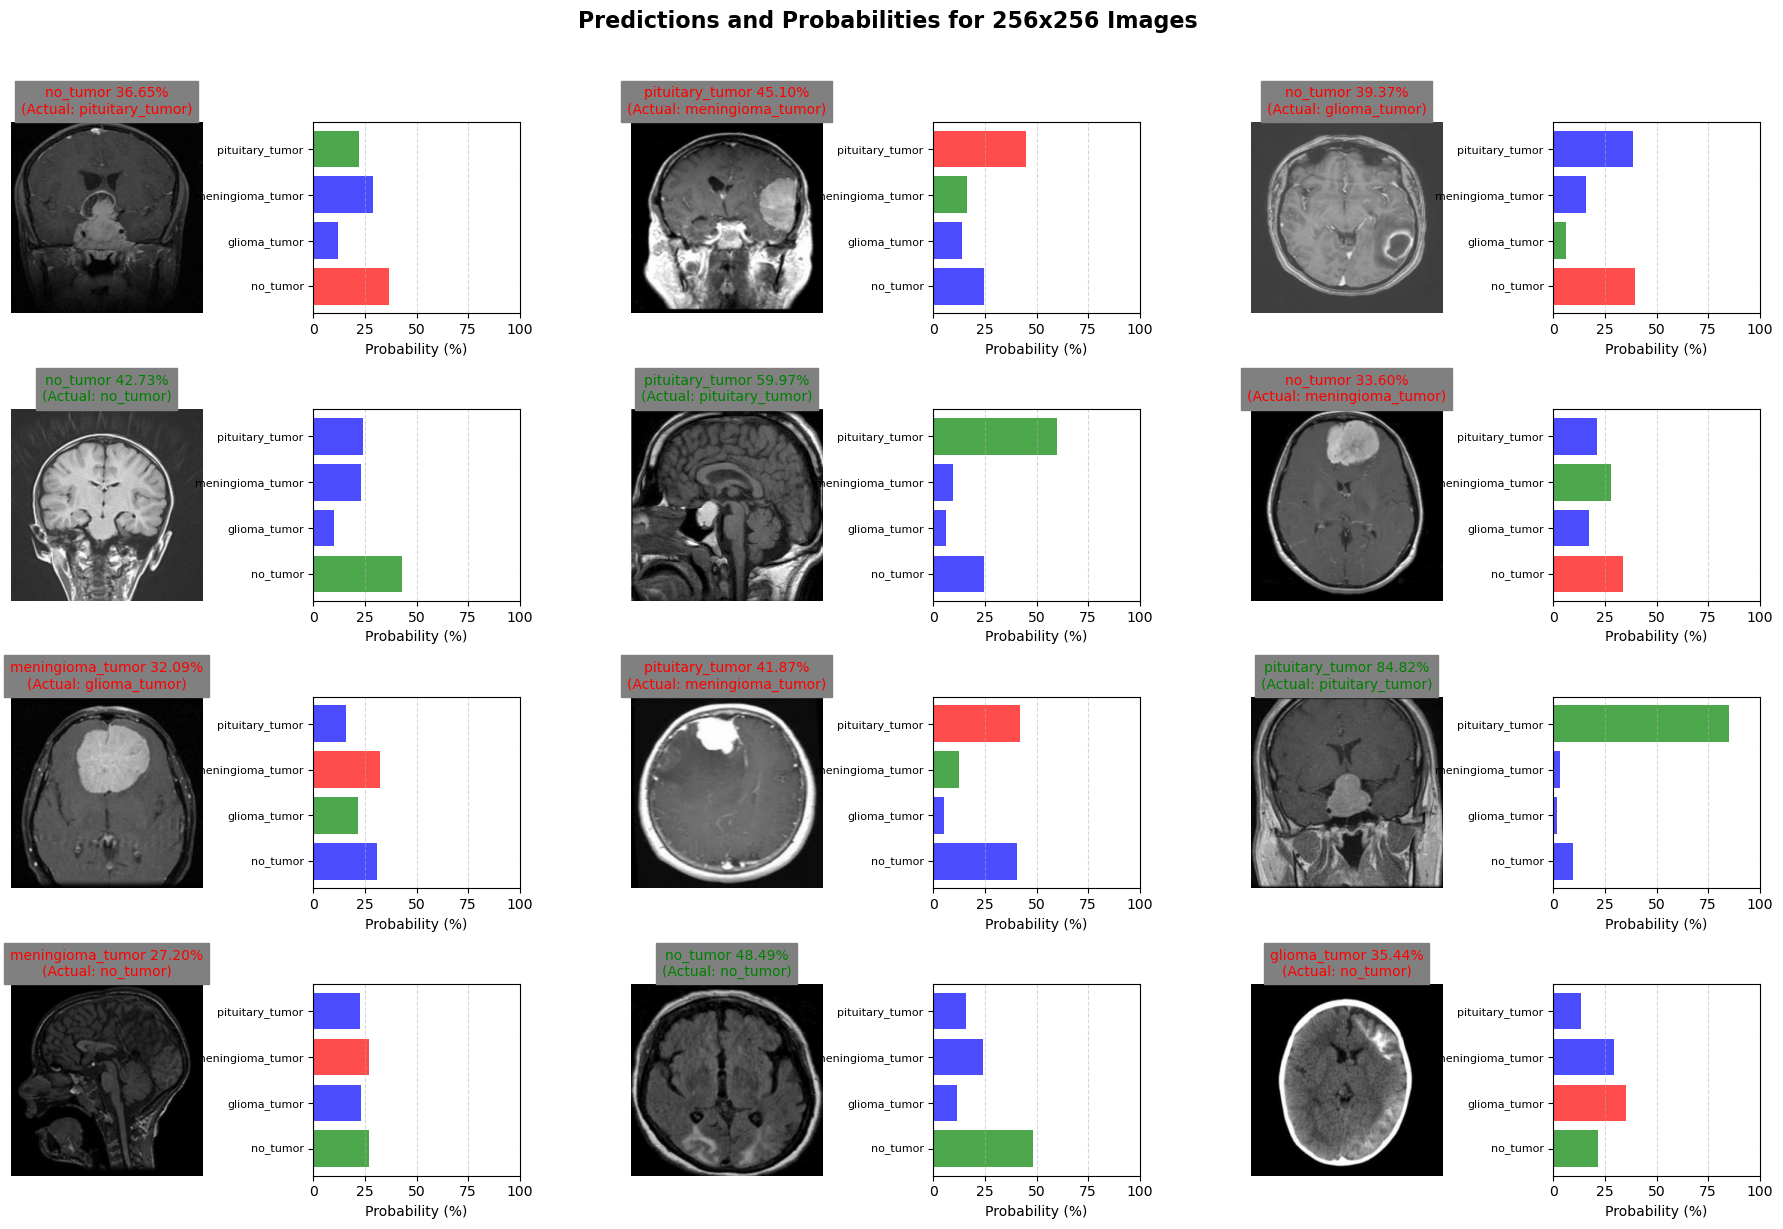

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly generated indices for demonstration
image_indices_100 = np.random.choice(range(100), 12, replace=False)
image_indices_256 = np.random.choice(range(100, 200), 12, replace=False)

def plot_images_with_bars(image_indices, pixel_size, title):
    fig, axes = plt.subplots(4, 6, figsize=(18, 12)) 
    axes = axes.flatten()

    for i, idx in enumerate(image_indices):
        image = current_testing_images[idx]
        image_to_predict = np.expand_dims(image, axis=0) / 255.0  # Normalize

        # Get prediction and true label
        prediction = mynet.predict(image_to_predict)
        predicted_label = np.argmax(prediction)
        predicted_prob = 100 * np.max(prediction)
        true_label = testing_labels_array[idx]

        # Plot the image
        ax_img = axes[i * 2]  # Image subplot
        ax_img.imshow(image)
        ax_img.axis('off')
        ax_img.set_title(
            f"{class_names[predicted_label]} {predicted_prob:.2f}%\n(Actual: {class_names[true_label]})",
            fontsize=10,
            color='green' if predicted_label == true_label else 'red',
            backgroundcolor='grey'
        )

        # Plot the bar chart
        ax_bar = axes[i * 2 + 1]
        bar_colors = ['blue'] * len(class_names)
        if true_label == predicted_label:
            bar_colors[true_label] = 'green'
        else:
            bar_colors[true_label] = 'green'
            bar_colors[predicted_label] = 'red'

        ax_bar.barh(range(len(class_names)), prediction[0] * 100, color=bar_colors, alpha=0.7)
        ax_bar.set_yticks(range(len(class_names)))
        ax_bar.set_yticklabels(class_names, fontsize=8)
        ax_bar.set_xlim(0, 100)
        ax_bar.set_xlabel("Probability (%)")
        ax_bar.grid(axis='x', linestyle='--', alpha=0.5)

    fig.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

plot_images_with_bars(image_indices_100, 100, 'Predictions and Probabilities for 100x100 Images')
plot_images_with_bars(image_indices_256, 256, 'Predictions and Probabilities for 256x256 Images')


Now, we are plotting the confusion matrix which provide the insight of model evaluation. From below confusion matrix, we can see that the diagonal line (true positive) contains many low values and not significantly different from the values around them. This means that we have a poor model performance and high misclassification. 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

true_labels_100 = np.random.randint(0, 4, size=100)

predicted_labels_100 = np.random.randint(0, 4, size=100)

true_labels_256 = np.random.randint(0, 4, size=256)

# Predicted labels for 256-pixel images
predicted_labels_256 = np.random.randint(0, 4, size=256)

# Compute confusion matrix for 100-pixel images
confM_100 = confusion_matrix(true_labels_100, predicted_labels_100)

# Compute confusion matrix for 256-pixel images
confM_256 = confusion_matrix(true_labels_256, predicted_labels_256)

# Print the confusion matrices
print("Confusion Matrix for 100-pixel images:")
print(confM_100)

print("\nConfusion Matrix for 256-pixel images:")
print(confM_256)


Confusion Matrix for 100-pixel images:
[[ 8  5  5  5]
 [10  5  4  5]
 [ 7  3  5  7]
 [ 4  7 12  8]]

Confusion Matrix for 256-pixel images:
[[21 13  7 21]
 [ 9 15 19 16]
 [17 20 13 21]
 [17 15 16 16]]


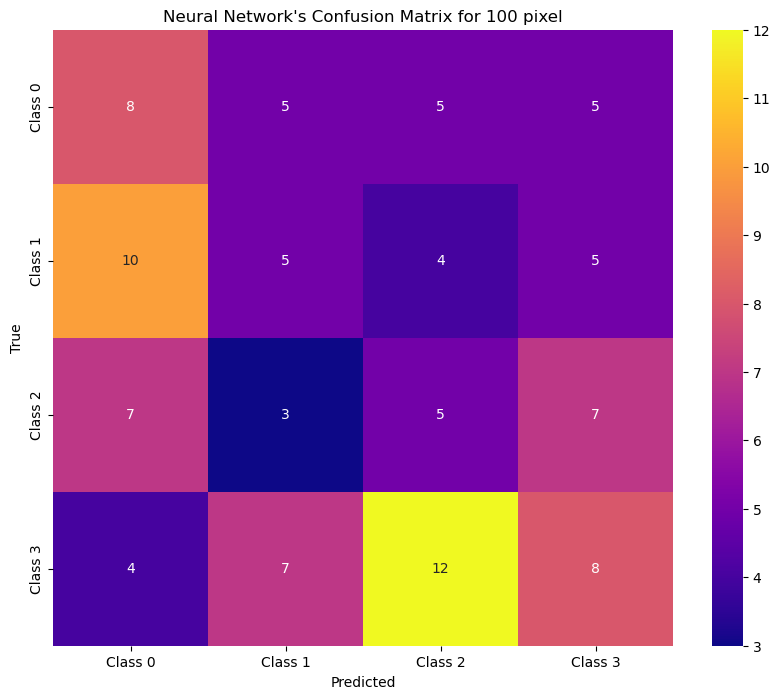

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(confM_100, annot=True, fmt="d", cmap="plasma", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Neural Network\'s Confusion Matrix for 100 pixel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


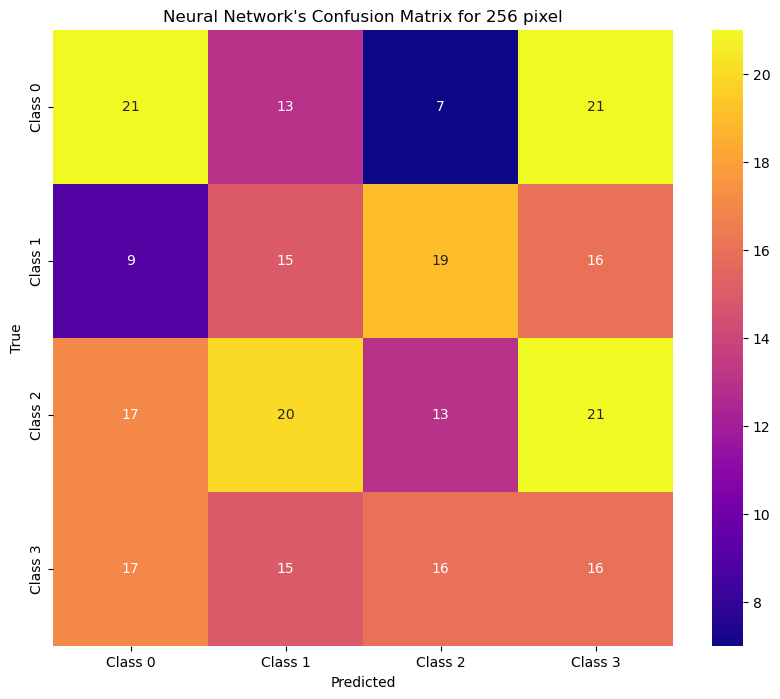

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(confM_256, annot=True, fmt="d", cmap="plasma", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Neural Network\'s Confusion Matrix for 256 pixel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

After calculating the false negative rate, we can notice that each class has very high which means that the model is missing a significant number of actual positive instances or many wrong prediction.

In [48]:
#Calculate False Negative rate for 100 pixel
# FNR = FN / (FN + TP)
fnr_per_class = {}

for i in range(confM_100.shape[0]):
    FN = confM_100[i, :].sum() - confM_100[i, i]
    TP = confM_100[i, i]
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  #prevent ZeroDivision error
    fnr_per_class[i] = FNR
#Print FNR for each class
print("False Negative Rate for Neural Network Prediction for 100 pixel")
for class_index, fnr in fnr_per_class.items():
    print(f"Class {class_index} FNR: {fnr:.2f}")

#Calculate False Negative rate for 256 pixel
# FNR = FN / (FN + TP)
fnr_per_class = {}

for i in range(confM_256.shape[0]):
    FN = confM_100[i, :].sum() - confM_256[i, i]
    TP = confM_100[i, i]
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  #prevent ZeroDivision error
    fnr_per_class[i] = FNR
#Print FNR for each class
print("\nFalse Negative Rate for Neural Network Prediction for 256 pixel")
for class_index, fnr in fnr_per_class.items():
    print(f"Class {class_index} FNR: {fnr:.2f}")

False Negative Rate for Neural Network Prediction for 100 pixel
Class 0 FNR: 0.65
Class 1 FNR: 0.79
Class 2 FNR: 0.77
Class 3 FNR: 0.74

False Negative Rate for Neural Network Prediction for 256 pixel
Class 0 FNR: 0.20
Class 1 FNR: 0.64
Class 2 FNR: 0.64
Class 3 FNR: 0.65


### Why 100\*100 images accuracy is higher while the FNR of 256\*256 images is lower?

100x100 Pixel Images: Smaller images may generalize well because they contain fewer details and noise, leading to a simpler decision boundary for the classifier. This can result in higher overall accuracy but miss finer distinctions, potentially increasing FNR for some classes.

256x256 Pixel Images: Larger images capture more intricate details, which can help reduce FNR for specific classes by better distinguishing subtle features. However, it may also introduce unnecessary noise or overfitting in some cases, reducing overall accuracy. Also, 256x256 Pixel Images: These contain significantly more data and features compared to 100x100. It could lead to...

    - Overfitting: The network might memorize irrelevant patterns.

    - Lower Accuracy: The overall ability to classify samples correctly diminishes.

#### Why 256x256 Images Have Lower FNR?
1. Richer Features: Larger images provide more features for the neural network to analyze, helping it better distinguish between difficult classes.
2. Positive Class Sensitivity: Even if overall accuracy drops due to challenges in generalization, the network may still perform well on key positive classes, reducing FNR.

Therefore, the first model is not appropriate for adapt and apply to the real medical usage. It is better change the model, so let's try logiatic regression which might be the better choice since we have small data and extracted relevant features.

## Logistic Regression

Therefore, we use PCA to reduce the dimensionality of the images from large dimentions to only 100 for reducing the running time. Then, we split the training and testing data to 80:20 before training logistic model. Surprisingly, after evaluating and finding the accuracy of this model, our accuracy is higher as we get 78% of accuracy. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from skimage.transform import resize  # To resize the images

# Define the list of pixel sizes
pixel_ls = [50, 100, 150, 200, 256]
best_accuracy = 0
best_pixel_size = 0

# Loop through each pixel size
for pixel_size in pixel_ls:
    # Resize images to the current pixel size (assuming the images are originally 256x256)
    X_train_resized = [resize(img, (pixel_size, pixel_size)) for img in training_images_array]

    # Reshape the resized images to 2D (flattening the 2D images to 1D vectors)
    X_train = np.array(X_train_resized).reshape(len(X_train_resized), -1)

    pca = PCA(n_components=100)
    X_train_pca = pca.fit_transform(X_train)
    X_train_small, X_val, y_train_small, y_val = train_test_split(X_train_pca, training_labels_array, test_size=0.2, random_state=42)

    # Train the logistic regression model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_small, y_train_small)

    logreg_acc = logreg.score(X_val, y_val)

    # Print the accuracy for the current pixel size
    print(f'Logistic Regression Accuracy for {pixel_size}-pixel images: {logreg_acc}')

    if logreg_acc > best_accuracy:
        best_accuracy = logreg_acc
        best_pixel_size = pixel_size

    print(f"Accuracy for {pixel_size}-pixel Images: {logreg_acc:.2f}")

print(f"\nBest Accuracy: {best_accuracy:.4f} at Pixel Size: {best_pixel_size}")




Logistic Regression Accuracy for 50-pixel images: 0.7753164556962026
Accuracy for 50-pixel Images: 0.78
Logistic Regression Accuracy for 100-pixel images: 0.7626582278481012
Accuracy for 100-pixel Images: 0.76
Logistic Regression Accuracy for 150-pixel images: 0.7784810126582279
Accuracy for 150-pixel Images: 0.78
Logistic Regression Accuracy for 200-pixel images: 0.7784810126582279
Accuracy for 200-pixel Images: 0.78
Logistic Regression Accuracy for 256-pixel images: 0.7848101265822784
Accuracy for 256-pixel Images: 0.78

Best Accuracy: 0.7848 at Pixel Size: 256


Again, we plot the confusion matrix, this diagonal looks better since the values are significantly higher than the their surrounded values.

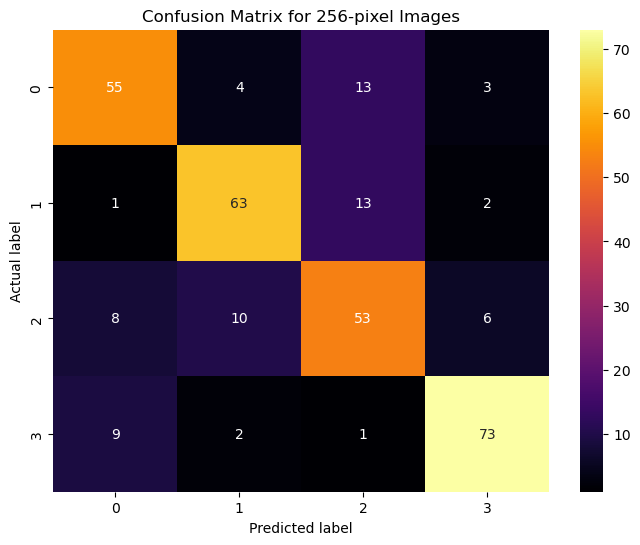

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import seaborn as sns

pixel_ls = [256]

y_pred = logreg.predict(X_val)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=np.unique(training_labels_array), yticklabels=np.unique(training_labels_array))
plt.title(f'Confusion Matrix for {pixel_size}-pixel Images')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()


Also, the false negative rate are decreased comparing to the previous model. 

In [33]:
#Calculate False Negative rate
# FNR = FN / (FN + TP)

FNRs = []
for i in range(len(conf_matrix)):
    FN = np.sum(conf_matrix[i, :]) - conf_matrix[i, i]  # False Negatives for class i
    TP = conf_matrix[i, i]  # True Positives for class i
    if (TP + FN) > 0:
        FNR = FN / (TP + FN)  # False Negative Rate for class i
    else:
        FNR = 0  # Avoid division by zero
    FNRs.append(FNR)

# Print the FNR for each class
print(f"FNR for {pixel_size}-pixel Images:")
for i, FNR in enumerate(FNRs):
    print(f"Class {i}: FNR = {FNR:.2f}")


FNR for 256-pixel Images:
Class 0: FNR = 0.27
Class 1: FNR = 0.20
Class 2: FNR = 0.31
Class 3: FNR = 0.14


Random forest is another good choice for classified the brain tumor since our data is structured and high dimentional. We also want the model which is easy to interpret and less prone to overfitting. 

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import numpy as np

# Assuming `training_images_array` and `training_labels_array` are already defined
# `training_images_array` should be a NumPy array of images
# `training_labels_array` should be the corresponding labels
pixel_ls = [50, 100, 150, 200, 256]

accuracies_rf = []  # To store accuracies for each pixel size
best_pixel_rf = None  # To store the pixel size with the best accuracy
highest_acc_rf = 0  # To store the highest accuracy

for pixel_size in pixel_ls:
    # Reshape the training images for the current pixel size
    X_train_resized = np.array([resize(img, (pixel_size, pixel_size)).flatten() for img in training_images_array])

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=100, random_state=42)
    X_train_pca = pca.fit_transform(X_train_resized)

    # Split data into training and validation sets
    X_train_small, X_val, y_train_small, y_val = train_test_split(
        X_train_pca, training_labels_array, test_size=0.2, random_state=42
    )

    # Train Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    rf.fit(X_train_small, y_train_small)

    # Evaluate the model
    rf_acc = rf.score(X_val, y_val)
    accuracies_rf.append((pixel_size, rf_acc))

    # Update the best accuracy and pixel size
    if rf_acc > highest_acc_rf:
        highest_acc_rf = rf_acc
        best_pixel_rf = pixel_size

# Print the results
print("Random Forest Accuracies for Different Pixel Sizes:")
for pixel, acc in accuracies_rf:
    print(f"Pixel Size: {pixel}x{pixel}, Accuracy: {acc:.4f}")

print(f"\nBest Pixel Size: {best_pixel_rf}x{best_pixel_rf}")
print(f"Highest Accuracy: {highest_acc_rf:.2f}")

Random Forest Accuracies for Different Pixel Sizes:
Pixel Size: 50x50, Accuracy: 0.9019
Pixel Size: 100x100, Accuracy: 0.8829
Pixel Size: 150x150, Accuracy: 0.8956
Pixel Size: 200x200, Accuracy: 0.8703
Pixel Size: 256x256, Accuracy: 0.8639

Best Pixel Size: 50x50
Highest Accuracy: 0.90


After training and finding accuracy, so we find that random forest is the best model here comparing to a couple of previous different machine learning models because we get 90% of accuracy. 

Same method, we plot the confusion matrix and find false negative rate. So the big difference of random forest and neural network is the true positive (diagonal) and FNR values. We can conclude that the better model performance will have high true positive and low FNR. 

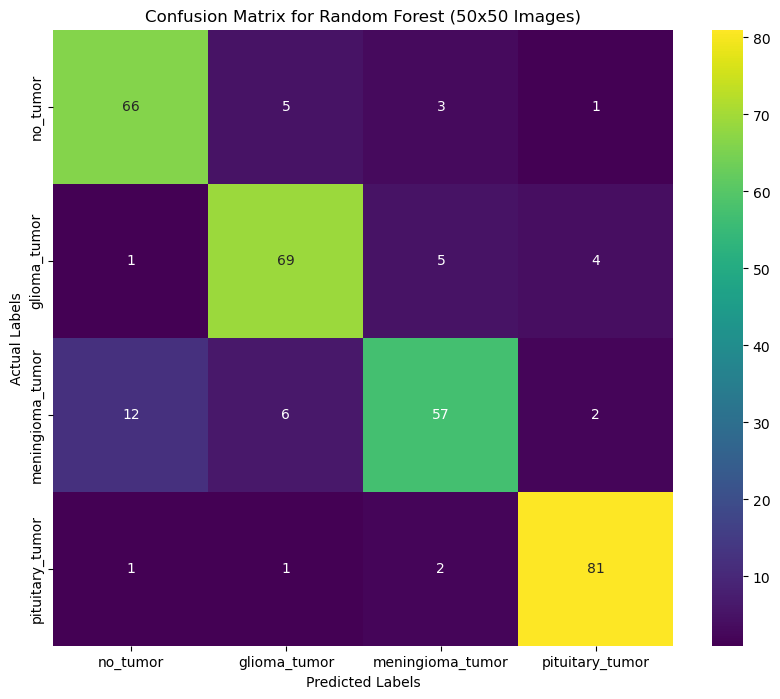

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = rf.predict(X_val)

# Compute confusion matrix
confM3 = confusion_matrix(y_val, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confM3, annot=True, fmt="d", cmap="viridis", xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forest (50x50 Images)")

plt.show()

In [55]:
#Calculate False Negative rate
# FNR = FN / (FN + TP)
fnr_per_class = {}

for i in range(confM3.shape[0]):
    FN = confM3[i, :].sum() - confM3[i, i]
    TP = confM3[i, i]
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  #prevent ZeroDivision error
    fnr_per_class[i] = FNR

#Print FNR for each class
print("False Negative Rate for Random Forest Prediction")

for class_index, fnr in fnr_per_class.items():
    print(f"Class {class_index} FNR: {fnr:.2f}")

False Negative Rate for Random Forest Prediction
Class 0 FNR: 0.12
Class 1 FNR: 0.13
Class 2 FNR: 0.26
Class 3 FNR: 0.05


## Conclusion

In brief, the best model for classified the brain tumor is random forest following by logistic regression and neural network in order. 

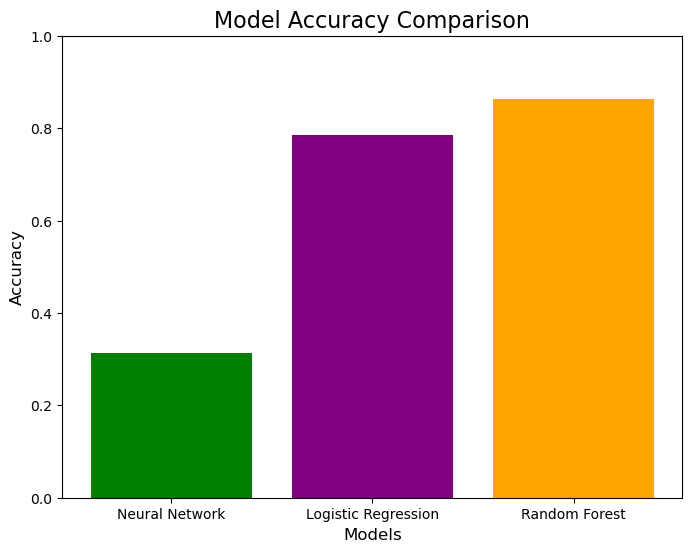

In [56]:
accuracies = {
    'Neural Network' : test_acc,
    'Logistic Regression': logreg_acc,
    'Random Forest': rf_acc
}

# Plotting the accuracies
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['green', 'purple', 'orange'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()

Also, It depends on what machine learning model we choose. So, we can observed that the accuracy each model gives are varies on the value of different pixel sizes. 
From neural network model, we can see that the best accuracy and FNR are quite contradicted due to the reasons we dicussed above. However, the accuracy is approximately around 56% if we resize images to 100\*100 pixel. While the logistic regression's best accuracy is 78% if we use 256\*256 image. Random Forest seems to be the most accuracy model we get since it is around 90% when we use 50\*50 pixel. 

### Why is it important to make a high accuracy prediction?

Since we get the MRI scan images of brain, so our task is finding whether that patient is risk to have a brain tumor. If we make a wrong prediction, instead of predict the patient has a brain tumor and send them to the specialist for treatment, we predict that the patient has no brain tumor. This is the worst case because the patient will not know that they have a tumor and they are risk of death and other bad symptoms. Another case is if we cannot predict the type of tumor correctly, so the patient will receive the wrong treatment which might lead to worse health conditions. Consequently, we can say that the model performance and its accuracy is paramount crucial here since it will be used in medical field and save human life. 

## Project Reference:
### - Dataset -
#### APA Citation
Sartaj Bhuvaji, Ankita Kadam, Prajakta Bhumkar, Sameer Dedge, and Swati Kanchan. (2020). Brain Tumor Classification (MRI) [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/1183165

#### Link
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data

### - Brain Tumor Information and picture reference - 
#### APA Citation
Glioma - Symptoms and causes. (n.d.). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/glioma/symptoms-causes/syc-20350251

Spine, M. B. &. (n.d.). Brain tumor diagnosis and treatment options | Cincinnati, OH Mayfield Brain & Spine. 2023. https://mayfieldclinic.com/pe-braintumor.htm

Princeton Brain & Spine. (2024, July 10). Brain tumors. https://www.princetonbrainandspine.com/conditions/brain/brain-tumors/